In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://**')

# Problem Statement Definition:

    Fitness equipment manufacturer has provided data of its existing customers who have bought the treadmill models of 
    KP281, KP481 and KP781. 
    
    The task at hand is to understand customer profiles of Aerofit with respect to the given customer details and then 
    deduce the possbile characteristic of the customers that are more likely to buy the differently priced models.
    
    Based on EDA, possible customer profiles can be formed and then the likelihood of each of these profiles purchasing the 
    KP281, KP481 or KP781 can be calculated. These will be used as a parameter for recommendation.

# Checking what Columns are present in the data set and the corresponding No. of Entries in each.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are 180 datapoints in total.
Information about datatypes for each of the columns
    
There are 9 Columns out of which 3 are Object type: 'Product', 'Gender', 'Marital Status' which are possibly the categorical variables. 
Rest are int64 type as they provide numerical data in relation to the categorical variable.

From the Above randomly sampled datapoints out of the data, we can see that most of the numerical columns have clearly defined units apart from Education and Fitness level.

In [7]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


[]

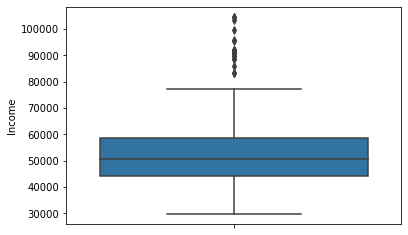

In [9]:
sns.boxplot(y=data['Income'])
plt.plot()

The average values, spread of the values and min-max values out of the 180 datapoints for each of the numerical columns are represented above.

In [10]:
data[data['Income']>80000].value_counts().sum()

19

Following insights about customer profiles taken from this table:
Age:
1. Average Age of Aerofit customers as visible from the present state of the data is around 28-29 years. 
2. The maximum age is 50 years while the youngest customers are around 18 years old. 
3. Given the standard deviation of 7 years, the maximum percentage of customers lie in the age range of 22-35 years. Also clarified by the percentile values.
Income:
1. Average income of Aerofit customers is 53000 USD and Median value is 50000 USD, since this difference is not too large, its indicative that the number(19) of outliers are not significant. 
While there are some exceptional cases of customers earning more than 100k USD and some below 30k USD.
These exceptions are indicated by the maximum(104581 USD) and minimum(29562 USD) values.
2. Normally customers earn in the range of 70k USD to 30k USD as judged from the given standard deviation of 16506 USD.
Education: 
1. Average education level is 15
2. Minimum education level of customers is 12, while maximum(highly qualified) is 21.
3. 50% of customers lie in the range of 14-16 education levels.

In [11]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no Null/missing values in the data

Standardizing Education column to remove confusion. Taking minimum value from the Education level column as 0 and then keeping increments from that value as the different level 
for better clarity of the column

In [13]:
data['Education']= data['Education']-data['Education'].min()

In [14]:
ed_dict = {0: 'High School', 1: 'Diploma', 2: 'Diploma', 3: 'Undergraduate', 4: 'Undergraduate', 5: 'Undergraduate', 6: 'Post-Grad', 7: 'Post-Grad', 8: 'Doctor or equivalent' , 9: 'Doctor or equivalent'}

In [15]:
for  i in range(len(data['Education'])):
    x = data['Education'][i]
    data['Education'][i] = ed_dict[x]

C:\Users\Nischay\AppData\Local\Temp/ipykernel_11104/427561596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'][i] = ed_dict[x]
C:\Users\Nischay\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
usage_dict = {2: 'Rare', 3:'Occassional', 4:'Average', 5:'Above Average', 6: 'Regular', 7:'Frequent'}
for  i in range(len(data['Usage'])):
    x = data['Usage'][i]
    data['Usage'][i] = usage_dict[x]

C:\Users\Nischay\AppData\Local\Temp/ipykernel_11104/812575212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Usage'][i] = usage_dict[x]


In [19]:
med_inc = np.median(data['Income'])
p40_inc = np.percentile(data['Income'],40)
p60_inc = np.percentile(data['Income'],60)
p25_inc = np.percentile(data['Income'],25)
p75_inc = np.percentile(data['Income'],75)
p5_inc = np.percentile(data['Income'],5)
p95_inc = np.percentile(data['Income'],95)
k = 0
data['Income Type'] = np.zeros(len(data['Income']))
for inc in data['Income']:
    if inc<=p60_inc and inc>=p40_inc:
        data['Income Type'][k] = 'Average'
    elif inc<=p40_inc and inc>=p25_inc:
        data['Income Type'][k] = 'Below Average'
    elif inc>=p60_inc and inc<=p75_inc:
        data['Income Type'][k] = 'Above Average'
    elif inc<=p25_inc and inc>=p5_inc:
        data['Income Type'][k] = 'Low'
    elif inc>=p75_inc and inc<=p95_inc:
        data['Income Type'][k] = 'High'
    elif inc<=p5_inc:
        data['Income Type'][k] = 'Very Low'
    elif inc>=p95_inc:
        data['Income Type'][k] = 'Very High'
    k+=1

C:\Users\Nischay\AppData\Local\Temp/ipykernel_11104/1755001291.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income Type'][k] = 'Very Low'


In [20]:
data.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Type
18,KP281,23,Female,Undergraduate,Single,Average,3,38658,113,Low
116,KP481,31,Female,Undergraduate,Partnered,Rare,3,51165,64,Average
1,KP281,19,Male,Undergraduate,Single,Rare,3,31836,75,Very Low
128,KP481,35,Female,Diploma,Partnered,Occassional,2,52302,53,Average
156,KP781,25,Male,Doctor or equivalent,Partnered,Average,5,74701,170,High
79,KP281,50,Female,Undergraduate,Partnered,Occassional,3,64809,66,High
86,KP481,21,Male,High School,Partnered,Rare,2,32973,53,Very Low
23,KP281,24,Female,Undergraduate,Partnered,Above Average,5,44343,188,Below Average
59,KP281,33,Female,Undergraduate,Single,Rare,2,55713,38,Above Average
130,KP481,35,Female,Undergraduate,Single,Occassional,2,50028,64,Average


# EDA on Single Dataset

In [21]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

[]

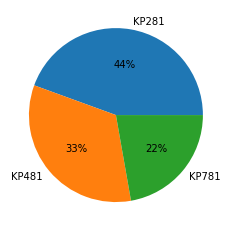

In [22]:
plt.pie(data['Product'].value_counts(), labels = ['KP281', 'KP481', 'KP781'], autopct = '%.0f%%')
plt.plot()

[]

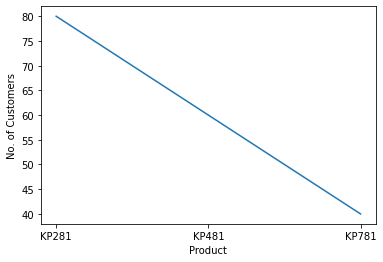

In [23]:
plt.plot(data['Product'].value_counts())
plt.xlabel('Product')
plt.ylabel('No. of Customers')
plt.plot()

KP281 which goes on sale for 1500USD has the most number of customers in the data, KP481 for 1750USD the second highest and KP781 the least.
So the number of customers has an inverse relationship to the price of the Product as per the data.

Value Counts for categorical variables with respect to the Products

In [24]:
data[['Product', 'Gender']].value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP781    Male      33
KP481    Male      31
         Female    29
KP781    Female     7
dtype: int64

In [25]:
data[['Product', 'Education']].value_counts()

Product  Education           
KP281    Undergraduate           43
         Diploma                 33
KP481    Undergraduate           32
         Diploma                 25
KP781    Post-Grad               19
         Undergraduate           15
         Doctor or equivalent     4
KP281    High School              2
         Post-Grad                2
KP481    Post-Grad                2
KP781    Diploma                  2
KP481    High School              1
dtype: int64

In [26]:
data[['Product', 'MaritalStatus']].value_counts()

Product  MaritalStatus
KP281    Partnered        48
KP481    Partnered        36
KP281    Single           32
KP481    Single           24
KP781    Partnered        23
         Single           17
dtype: int64

In [27]:
data[['Product', 'Usage']].value_counts()

Product  Usage        
KP281    Occassional      37
KP481    Occassional      31
KP281    Average          22
         Rare             19
KP781    Average          18
KP481    Rare             14
         Average          12
KP781    Above Average    12
         Regular           7
KP481    Above Average     3
KP281    Above Average     2
KP781    Frequent          2
         Occassional       1
dtype: int64

In [28]:
pd.crosstab(index = data['Product'], columns = data['Gender'], normalize = 'index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


[]

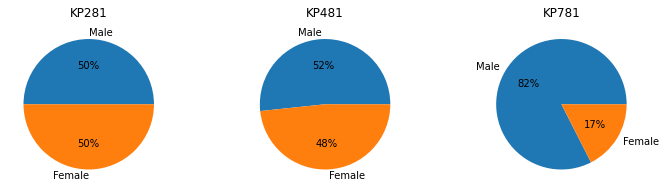

In [29]:
plt.figure(figsize = (12,3))
plt.subplot(1,3,1)
plt.pie(data[data['Product']=='KP281']['Gender'].value_counts(), labels = ['Male', 'Female'], autopct = '%.0f%%')
plt.title('KP281')
plt.plot()
plt.subplot(1,3,2)
plt.pie(data[data['Product']=='KP481']['Gender'].value_counts(), labels = ['Male', 'Female'], autopct = '%.0f%%')
plt.title('KP481')
plt.plot()
plt.subplot(1,3,3)
plt.pie(data[data['Product']=='KP781']['Gender'].value_counts(), labels = ['Male', 'Female'], autopct = '%.0f%%')
plt.title('KP781')
plt.plot()

Both Cheaper categories of Products KP281 and KP481 have equivalent distribution (50%-50%) of customers of the Male and Female genders. 
But, among 40 customers of KP781, 82.5% are Males and 17.5% are Females. This shows that Males are more likely to buy the higher priced Product when compared with Females.

[]

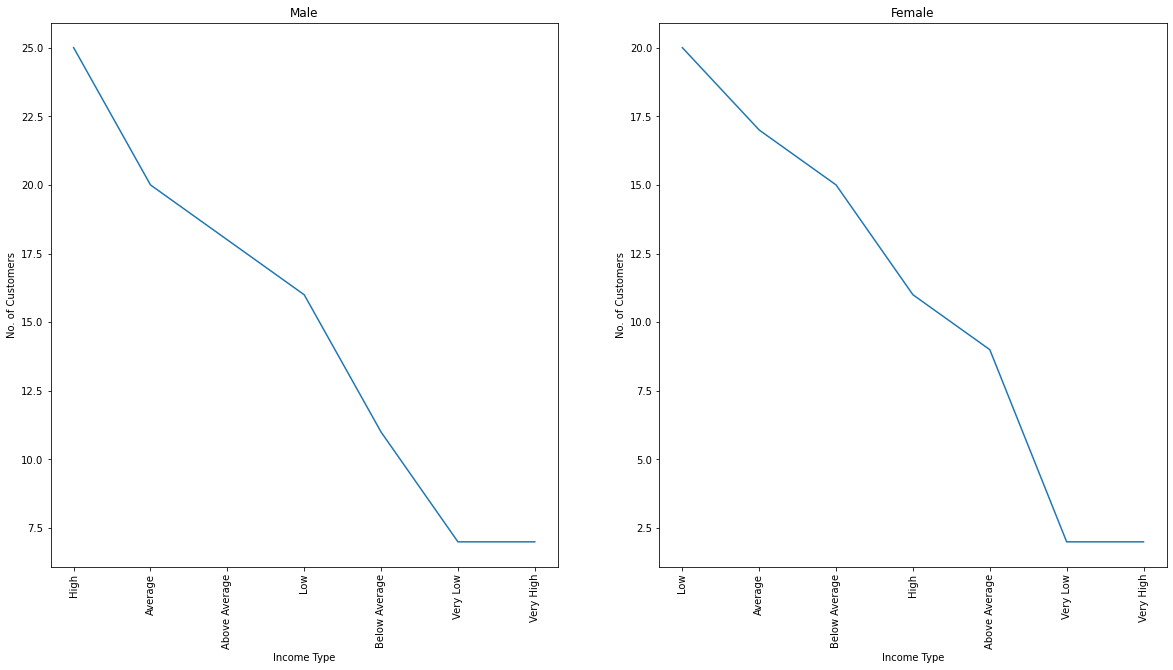

In [30]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(data[data['Gender']=='Male']['Income Type'].value_counts())
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('No. of Customers')
plt.title('Male')
plt.subplot(1,2,2)
plt.plot(data[data['Gender']=='Female']['Income Type'].value_counts())
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('No. of Customers')
plt.title('Female')
plt.plot()

C:\Users\Nischay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nischay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nischay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

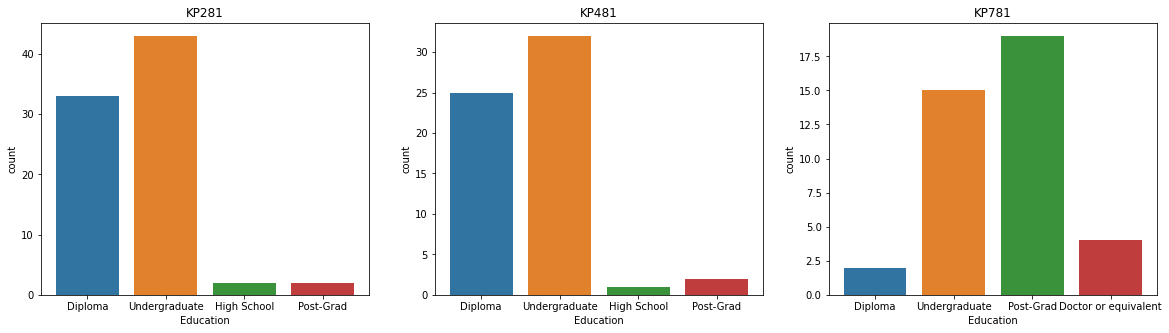

In [31]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.countplot(data[data['Product']=='KP281']['Education'])
plt.title('KP281')
plt.plot()
plt.subplot(1,3,2)
sns.countplot(data[data['Product']=='KP481']['Education'])
plt.title('KP481')
plt.plot()
plt.subplot(1,3,3)
sns.countplot(data[data['Product']=='KP781']['Education'])
plt.title('KP781')
plt.plot()

In [32]:
prod_ed = pd.crosstab(index = data['Product'], columns = data['Education'], normalize = 'index')

In [33]:
usage_ed =  pd.crosstab(index = data['Education'], columns = data['Usage'], normalize = 'index')

In [34]:
def prob_color(x):
    if x>=0.1:
        color = 'blue' 
    elif x<0.1 and x>0:
        color = 'red'
    else: 
        color = 'black'
    return 'color: %s' %color

In [35]:
prod_ed.style.applymap(prob_color)

Education,Diploma,Doctor or equivalent,High School,Post-Grad,Undergraduate
Product,,,,,
KP281,0.412500,0.000000,0.025000,0.025000,0.537500
KP481,0.416667,0.000000,0.016667,0.033333,0.533333
KP781,0.050000,0.100000,0.000000,0.475000,0.375000


In [36]:
usage_ed.style.applymap(prob_color)

Usage,Above Average,Average,Frequent,Occassional,Rare,Regular
Education,,,,,,
Diploma,0.033333,0.200000,0.016667,0.500000,0.250000,0.000000
Doctor or equivalent,0.000000,0.750000,0.000000,0.000000,0.000000,0.250000
High School,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000
Post-Grad,0.304348,0.304348,0.043478,0.130435,0.043478,0.173913
Undergraduate,0.088889,0.322222,0.000000,0.388889,0.177778,0.022222


In [37]:
pd.crosstab(index = data['Product'], columns = data['Usage'], normalize = 'index').style.applymap(prob_color)

Usage,Above Average,Average,Frequent,Occassional,Rare,Regular
Product,,,,,,
KP281,0.025000,0.275000,0.000000,0.462500,0.237500,0.000000
KP481,0.050000,0.200000,0.000000,0.516667,0.233333,0.000000
KP781,0.300000,0.450000,0.050000,0.025000,0.000000,0.175000


Key Insights:
1: Probability of customers having a Diploma or Undergraduate degree and Purchasing the KP281 and KP481 have the highest Probability values of 0.4125 and 0.4167 respectively. 

2: Customers having a Diploma or Undergraduate degree have higher probabilities of being an Occassional User(0.5 and 0.39) or Average user(0.2 and 0.32). 
This matches with the Probability values of owning KP281/KP481 and being an occassional User(0.46/0.52), or being an Average User(0.275/0.2).Hence, the People with undergraduate or Diploma degrees tend to make the customer profiles and the target customers for KP281 and KP481. 

3: The Probability of customers usage being Average, Above average or regular and owning the KP781 is 0.925. This shows that owning a KP781 definitely depends on the usage of customers.

4: A consistency in probability values is observed for Post-Grad qualification customers, as their Above average and Regular Usage Probabilities are around 0.47. While the Probability of Post Grad customers owning the KP781 is also the highest, 0.475. This is a very clear parameter. Hence, customers with a Post graduate degree, do tend to have a higher usage for the equipment and they definitely are more likely to buy the KP781. 


Since customers holding the High School Education or lower and buying either of the 3 models have a very low probability of less than 0.1 and them being an occassional or rare  user>0.5, hence they should not be considered as target customers by Aerofit.


    Comparing Incomes of customers with education levels to conclude that education level impacts the purchase of higher or lower priced models.

[]

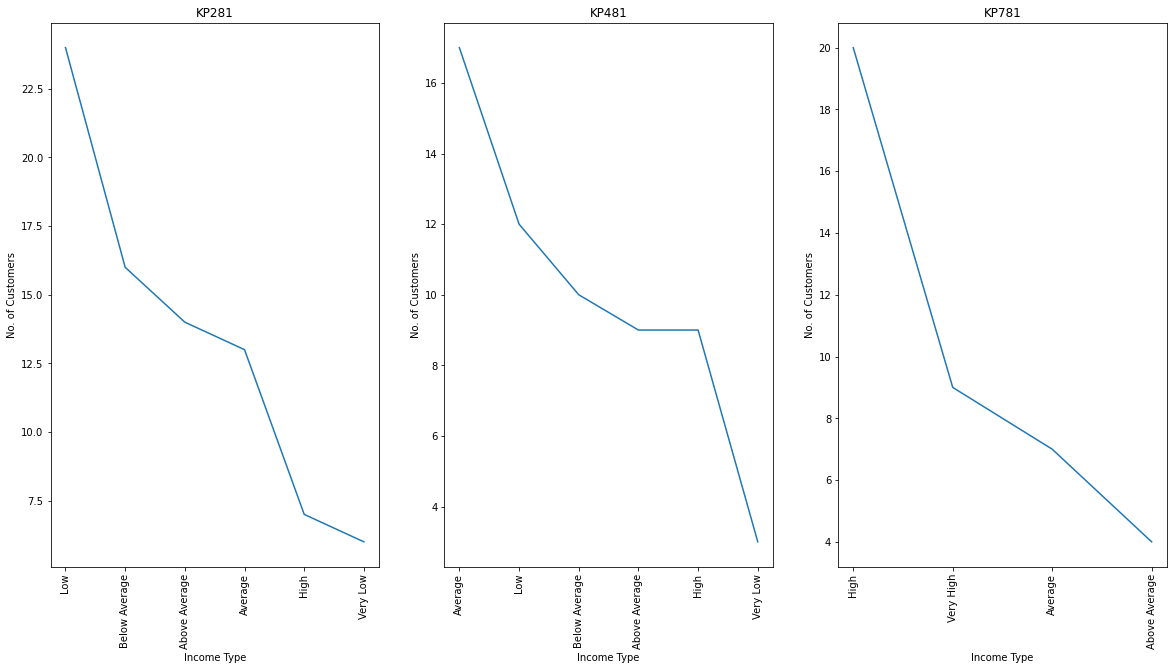

In [38]:
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
plt.plot(data[data['Product']=='KP281']['Income Type'].value_counts())
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('No. of Customers')
plt.title('KP281')
plt.subplot(1,3,2)
plt.plot(data[data['Product']=='KP481']['Income Type'].value_counts())
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('No. of Customers')
plt.title('KP481')
plt.subplot(1,3,3)
plt.plot(data[data['Product']=='KP781']['Income Type'].value_counts())
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('No. of Customers')
plt.title('KP781')
plt.plot()

The Maximum number of customers tend to have an average income and less than 10 customers tend to have very low and very high incomes. This is somewhat in conjunction of the earlier observation that the customers buying KP

[]

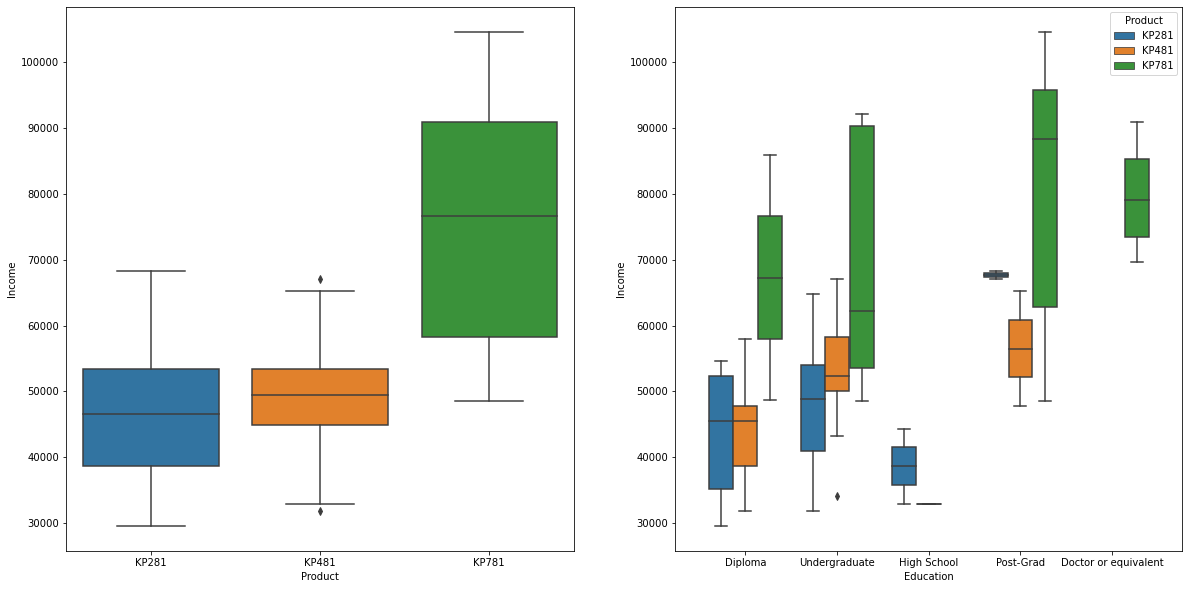

In [39]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(y=data['Income'], x = data['Product'])
plt.plot()
plt.subplot(1,2,2)
sns.boxplot(y=data['Income'], x = data['Education'], hue = data['Product'])
plt.plot()

With these 2 plots, it is compared and possible to conclude that incomes of customers purchasing the lower priced models are in the lower income ranges and education might be contributing factor in that.

KP281: Has a median income of around 45000 USD and the minimum - maximim values as 30000 USD - 70000 USD with no outliers. 
50% of customers have an income range of 40000 USD-55000 USD

KP481: Has a median income of around 50000 USD and the minimum - maximim values as 48000 USD - 65000 USD with 1 outlier. 
50% of customers have an income range of 55000 USD-65000 USD

KP781: Has a median income of around 80000 USD and the minimum - maximim values as 50000 USD - 104000 USD with no outlier. 
50% of customers have an income range of 60000 USD-90000 USD

In [40]:
pd.crosstab(index = data['Product'], columns = data['Income Type'], normalize = 'index').style.applymap(prob_color)

Income Type,Above Average,Average,Below Average,High,Low,Very High,Very Low
Product,,,,,,,
KP281,0.175000,0.162500,0.200000,0.087500,0.300000,0.000000,0.075000
KP481,0.150000,0.283333,0.166667,0.150000,0.200000,0.000000,0.050000
KP781,0.100000,0.175000,0.000000,0.500000,0.000000,0.225000,0.000000


Majority KP281 customers have an income in the range of Low to Average, with a combined joint probability value of 0.73.

KP481 customers have an income in the wider range of Low to High, with equally distributed probabilities of around 0.2.

Maximum customers owning the KP781 have High or Very High incomes with combined joint probabilities of 0.7225. 

There are no customers who have Very high incomes and buy the KP481 or KP781.

Similarly no customers with Below average or lower incomes buy the KP781.

Therefore, Safe Targets for each category based on incomes are:

    KP281 --> Low, Below Average

    KP481 --> Average, Above Average, High

    KP781 --> High, Very High

In [41]:
pd.crosstab(index = data['Income Type'], columns = data['Education'], normalize = 'index').style.applymap(prob_color)

Education,Diploma,Doctor or equivalent,High School,Post-Grad,Undergraduate
Income Type,,,,,
Above Average,0.296296,0.000000,0.000000,0.074074,0.629630
Average,0.270270,0.000000,0.000000,0.081081,0.648649
Below Average,0.615385,0.000000,0.038462,0.000000,0.346154
High,0.027778,0.111111,0.000000,0.305556,0.555556
Low,0.527778,0.000000,0.000000,0.000000,0.472222
Very High,0.000000,0.000000,0.000000,0.777778,0.222222
Very Low,0.666667,0.000000,0.222222,0.000000,0.111111


Probability of Being a Post Grad and Having very high incomes is 0.78, which is extremely good. This fits in well with earlier recommendation of Post Grad customers being the Target for KP781.

Another Conclusion that can be ensured from this comparative plots and above given table is:
Even though education levels of customers buying the KP481 and KP281 are proportionate, but the median incomes for the same education level are greater for KP481 customers.
The difference is not very significant but definitely exists.
KP781 customers in general have higher incomes irrespective of their education level. The median income for Post Grad customers have the highest income which
indicates they might have more years of work experience or they could be professional athletes.

In [42]:
pd.crosstab(index = data['Gender'], columns = data['Education'])

Education,Diploma,Doctor or equivalent,High School,Post-Grad,Undergraduate
Gender,,,,,
Female,31,1,0,7,37
Male,29,3,3,16,53


In [43]:
hm = pd.crosstab(index = data['Gender'], columns = data['Usage'], normalize = 'index').style.applymap(prob_color)
hm

Usage,Above Average,Average,Frequent,Occassional,Rare,Regular
Gender,,,,,,
Female,0.092105,0.184211,0.000000,0.434211,0.263158,0.026316
Male,0.096154,0.365385,0.019231,0.346154,0.125000,0.048077


[]

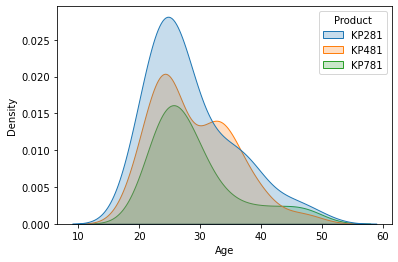

In [44]:
sns.kdeplot(data['Age'], hue = data['Product'], fill = True)
plt.plot()

[]

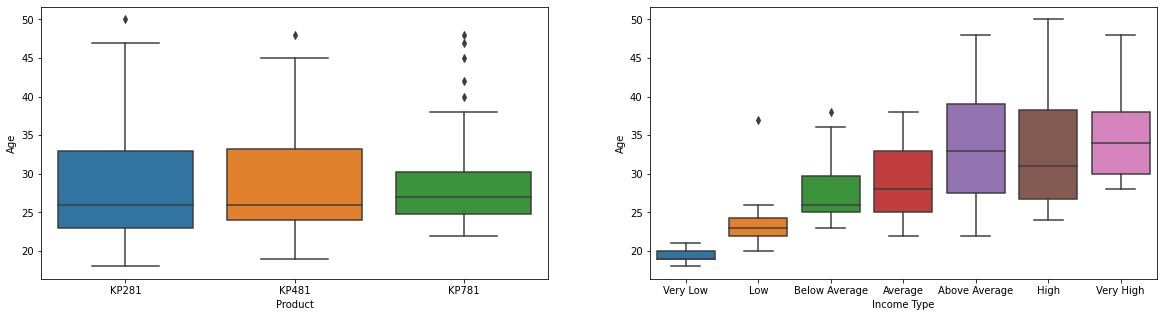

In [45]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['Age'], x = data['Product'])
plt.plot()
plt.subplot(1,2,2)
sns.boxplot(y = data['Age'], x= data['Income Type'])
plt.plot()

More than 50% of customers from all three categories fall in the age groups of 20 to 35.

There is a definite rising trend in the relationship between Incomes and Age of customers. Observation: Median Age of customers with very high incomes is around 35, while for Average Incomes, the median age is below 30 years.

[]

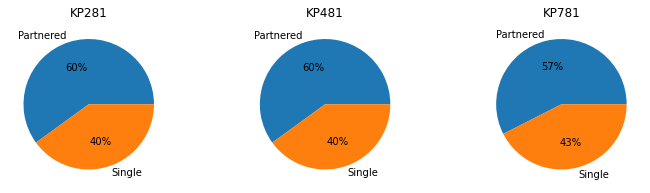

In [46]:
plt.figure(figsize = (12,3))
plt.subplot(1,3,1)
plt.pie(data[data['Product']=='KP281']['MaritalStatus'].value_counts(), labels = ['Partnered','Single'], autopct = '%.0f%%')
plt.title('KP281')
plt.plot()
plt.subplot(1,3,2)
plt.pie(data[data['Product']=='KP481']['MaritalStatus'].value_counts(), labels = ['Partnered','Single'], autopct = '%.0f%%')
plt.title('KP481')
plt.plot()
plt.subplot(1,3,3)
plt.pie(data[data['Product']=='KP781']['MaritalStatus'].value_counts(), labels = ['Partnered','Single'], autopct = '%.0f%%')
plt.title('KP781')
plt.plot()

The division of customers with respect to the Product and Marital Status Parameter are shown above:
As observed all the product categories follow a similar proportion. With 60% of customers partnered and 40% Single for KP281 and KP481.
While for KP781, 57% are partenered and 43% are Single.

Which shows, the Single customers overall are less likely to Purchase any of the Products when compared with Partnered Individuals. 
Also, these customers are more likely to purchase the KP781 than the lower priced models.

In [47]:
pd.crosstab(index = data['MaritalStatus'], columns = data['Income Type'], normalize = 'index').style.applymap(prob_color)

Income Type,Above Average,Average,Below Average,High,Low,Very High,Very Low
MaritalStatus,,,,,,,
Partnered,0.158879,0.177570,0.149533,0.233645,0.177570,0.074766,0.028037
Single,0.136986,0.246575,0.136986,0.150685,0.232877,0.013699,0.082192


In [48]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Type
0,KP281,18,Male,Diploma,Single,Occassional,4,29562,112,Very Low
1,KP281,19,Male,Undergraduate,Single,Rare,3,31836,75,Very Low
2,KP281,19,Female,Diploma,Partnered,Average,3,30699,66,Very Low
3,KP281,19,Male,High School,Single,Occassional,3,32973,85,Very Low
4,KP281,20,Male,Diploma,Partnered,Average,2,35247,47,Low
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,Doctor or equivalent,Single,Regular,5,83416,200,High
176,KP781,42,Male,Post-Grad,Single,Above Average,4,89641,200,High
177,KP781,45,Male,Undergraduate,Single,Above Average,5,90886,160,High
178,KP781,47,Male,Post-Grad,Partnered,Average,5,104581,120,Very High


# Actionable Insights and Recommendations:
    1 The highest selling Products as per the data are KP281 and KP481. The number of customers followed a downward trend in terms of equipments sold from KP281-->KP781.
    This was in conjunction with the conclusion that more number of customers had Average-->Above Average Incomes hence the number of customers buying the KP281 and KP481 were more.
    
    Therefore, the stock for KP481 and KP281 should be kept higher than KP781 as these are the more desirable models and generally the incomes follow the same trend as in the given 
    data.
    
    2 In general Male and Female customers are equally likely to buy the KP481 or KP281 models. However, Male customers are 65% more likely to purchase the KP781 in comparison
    to Female customers. This agrees with the fact that there are around 45 Male customers who earn Average to High incomes in comparison to 28 Female customers. 
    
    So, among the 2 genders, Male customers should be targetted more during the marketing of the KP781 model. While people from both genders should be targetted equally for KP281 and
    KP481.
    
    3 Customers having a Diploma or Undergraduate degree have higher probabilities of being an Occassional User(0.5 and 0.39) or Average user(0.2 and 0.32). 
    This matches with the Probability values of owning KP281/KP481 and being an occassional User(0.46/0.52), or being an Average User(0.275/0.2).
    
    Hence, the People with undergraduate or Diploma degrees tend to be apt for the customer profiles and as target customers for KP281 and KP481. 
    
    4 A consistency in probability values is observed for Post-Grad qualification customers, as their Above average and Regular Usage Probabilities are around 0.47. While the
    Probability of Post Grad customers owning the KP781 is also the highest, 0.475. 
    
    Probability of Being a Post Grad and Having very high incomes is 0.78, which is extremely good. This fits in well with earlier recommendation of Post Grad customers 
    being the Prime Target for KP781.
    
    5 People who hold a Diploma or Undergraduate Degree are also prime targets for selling the KP781, if they are older than 30 years of age, as income has a linear relationship with
    age of customers in the given data. 
    
    Customers in the Age range of 20-35 comprise the main age gap of customers in this data for all 3 models. They should be given priority in marketing and sale. However, customers
    with an age>40 should be targetted for the KP781 model, as they will have higher incomes irrespective of the education. 
    
    6 Safe Targets for each category based on incomes are:

    KP281 --> Low(34000 USD < Income < 44000 USD), Below Average(44000 USD < Income < 48000 USD)

    KP481 --> Average(48000 USD < Income < 53000 USD), Above Average(53000 USD < Income < 59000 USD), High(59000 USD < Income < 91000 USD)

    KP781 --> High(59000 USD < Income <91000 USD), Very High(Income > 91000 USD)
    
    7 People with Partners are more likely(60-40 chances) to Purchase the Products across all categories and since marketing exposure will also be higher when targetting 2 people from
    the same household. 
    
    8 However, Single People with higher incomes can be targetted if they tend to have a lower education level like Diploma and age less than equal to 25 years. If these parameters
    are satisfied for any customer in research, the product being marketted should be KP781 as these people are most likely Athletes. 
    